   Experience Years  Salary
0               1.1   39343
1               1.2   42774
2               1.3   46205
3               1.5   37731
4               2.0   43525
Index(['Experience Years', 'Salary'], dtype='object')
(40, 2)


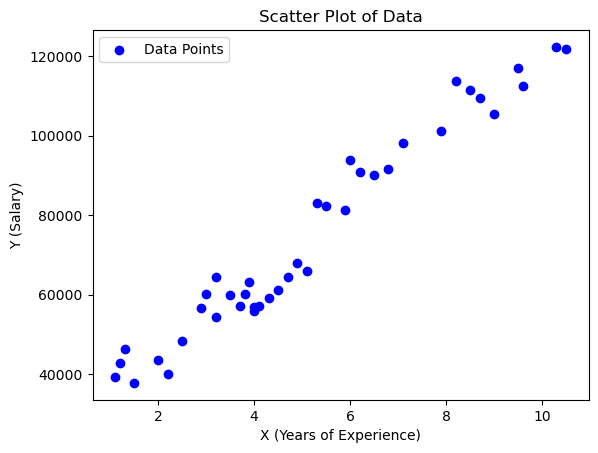

Mean Absolute Error: 6419.91


/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


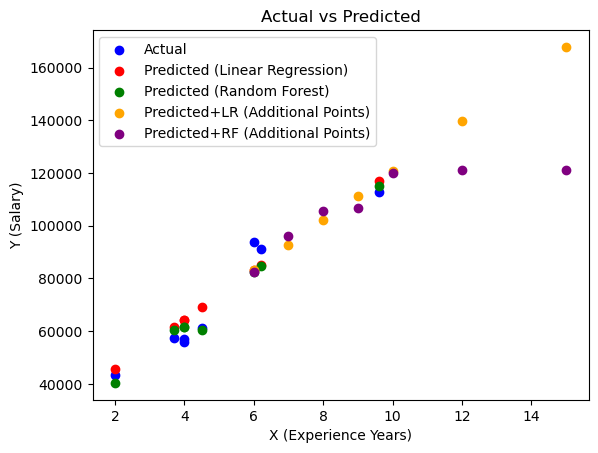

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


# Step 1: Read CSV File
file_path = "https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv"  # Change this to your CSV file
df = pd.read_csv(file_path)

# Display first few rows of the data
print(df.head())
print (df.columns)
print (df.shape)

# # Step 2: Visualize Data
plt.scatter(df["Experience Years"], df["Salary"], color="blue", label="Data Points")
plt.xlabel("X (Years of Experience)")
plt.ylabel("Y (Salary)")
plt.title("Scatter Plot of Data")
plt.legend()
plt.show()

# Step 3: Train a Model for Prediction
# Define Features (X) and Target (Y)
X = df[["Experience Years"]]  # Assuming 'X' is the feature
#If you want multiple features, modify X = df[["Feature1", "Feature2"]]
Y = df["Salary"]    # Assuming 'Y' is the target

# Split data into training & testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Train a Random Forest Regressor model
model2 = RandomForestRegressor()
model2.fit(X_train, Y_train)

# Make Predictions
Y_pred = model.predict(X_test)

# Make Predictions
Y_pred2 = model2.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae:.2f}")



# Evaluate Model for additional points
X_test_new = np.array([6, 7, 8, 9, 10, 12, 15]).reshape(-1, 1)
Y_pred_new = model.predict(X_test_new)

Y_pred_new2 = model2.predict(X_test_new)


# Plot Predictions
plt.scatter(X_test, Y_test, color="blue", label="Actual")
plt.scatter(X_test, Y_pred, color="red", label="Predicted (Linear Regression)")
plt.scatter(X_test, Y_pred2, color="green", label="Predicted (Random Forest)")
plt.scatter(X_test_new, Y_pred_new, color="orange", label="Predicted+LR (Additional Points)")
plt.scatter(X_test_new, Y_pred_new2, color="purple", label="Predicted+RF (Additional Points)")
plt.xlabel("X (Experience Years)")
plt.ylabel("Y (Salary)")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [17]:
print (type(X_test))
X_test_new = np.array([6, 7, 8, 9, 10, 12, 15]).reshape(-1, 1)

print (type(X_test_new))
Y_pred_new = model.predict(X_test_new)
print (Y_pred_new)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[ 83164.43781119  92572.46908369 101980.5003562  111388.5316287
 120796.56290121 139612.62544622 167836.71926374]


/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
# use for fillna
import pandas as pd

# Create a sample DataFrame with missing values
data = {'A': [1, 2, None, 4], 'B': [None, 5, 6, 7]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Fill NaN values with 0
df_filled = df.fillna(0)

print("\nDataFrame after fillna(0):")
print(df_filled)


Original DataFrame:
     A    B
0  1.0  NaN
1  2.0  5.0
2  NaN  6.0
3  4.0  7.0

DataFrame after fillna(0):
     A    B
0  1.0  0.0
1  2.0  5.0
2  0.0  6.0
3  4.0  7.0


In [3]:
#You can replace NaN values with mean, median, or mode.
df['A'] = df['A'].fillna(df['A'].mean())  # Fill NaN with column A's mean
df['B'] = df['B'].fillna(df['B'].median())  # Fill NaN with median of column B
print (df)

          A    B
0  1.000000  6.0
1  2.000000  5.0
2  2.333333  6.0
3  4.000000  7.0


In [6]:
print (df)
#Forward Fill (ffill) and Backward Fill (bfill)
df.fillna(method='ffill', inplace=True)  # Forward Fill
df.fillna(method='bfill', inplace=True)  # Backward Fill
print (df)

     A    B
0  1.0  NaN
1  2.0  5.0
2  NaN  6.0
3  4.0  7.0
     A    B
0  1.0  5.0
1  2.0  5.0
2  2.0  6.0
3  4.0  7.0


/var/folders/6d/d48flt4x3yz19d_dbv88qs600000gq/T/ipykernel_57597/4094666250.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward Fill
/var/folders/6d/d48flt4x3yz19d_dbv88qs600000gq/T/ipykernel_57597/4094666250.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward Fill


In [8]:
#df.fillna({'A': 100, 'B': 200}, inplace=True)  # Different fill values for each column
df.fillna({'A': 100, 'B': 200}, inplace=True)  # Different fill values for each column
print (df)

       A      B
0    1.0  200.0
1    2.0    5.0
2  100.0    6.0
3    4.0    7.0


df.dropna() in Pandas 🐍📊

In [9]:
import pandas as pd

# Sample DataFrame with NaN values
data = {'A': [1, 2, None, 4], 'B': [None, 5, 6, 7]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Drop rows with any NaN values
df_cleaned = df.dropna()

print("\nDataFrame after dropna():")
print(df_cleaned)


Original DataFrame:
     A    B
0  1.0  NaN
1  2.0  5.0
2  NaN  6.0
3  4.0  7.0

DataFrame after dropna():
     A    B
1  2.0  5.0
3  4.0  7.0
